<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

# 6.데이터프레임 변경 (2)

- 정확한 데이터 분석을 위해서는 정확한 데이터가 준비되어야 합니다.
- 정확한 데이터 준비를 위해 누락된 데이터나 중복 데이터를 제거하는 전처리 작업이 필요합니다.

In [8]:
# 라이브러리 불러오기
import pandas as pd

import numpy as np

## 6.1.결측치 처리

- NaN 값, 즉 결측치는 정확한 분석을 방해합니다.
- NaN 값을 만나면 오류가 발생하는 함수도 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/nan.png' width=700 align="left"/>

- NaN 값은 제거하든지 다른 값(예를 들면 평균값, 최빈값 등)으로 채워야 합니다.

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [10]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 6.1.1.결측치 찾기

- 결측치 존재 여부를 확인하고 이를 어떻게 처리할 지 방법을 결정해야 합니다.
- 결측치를 확인할 수 있는 방법은 참 많습니다.

**1) info() 메서드로 확인**

In [12]:
# 값 개수로 결측치 존재 여부 확인
air.info()  # 총 153개중 결측치가 없는 개수 116 , 146 즉 Ozone .Solar.R 은 결측치를 포함하고 있다 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


**2) isnull(), notnull() 메서드 사용**

- **isnull()** 메서드는 결측치면 True, 유효한 값이면 False를 반환합니다.
- **notnull()** 메서드는 결측치면 False, 유효한 값이면 True를 반환합니다.
- isnull() 대신 **isna()**, notnull() 대신 **notna()** 메서드를 사용해도 됩니다.

In [14]:
# 전체 데이터 중에서 결측치는 True로 표시
air.isnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,True,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,True,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


In [16]:
# 전체 데이터 중에서 결측치는 False로 표시
air.notnull()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,False,True,True,True,True
...,...,...,...,...,...,...
148,True,True,True,True,True,True
149,False,True,True,True,True,True
150,True,True,True,True,True,True
151,True,True,True,True,True,True


- **sum()** 메서드를 사용해 True 값의 개수, 즉 **열의 결측치 개수**를 확인할 수 있습니다.

In [21]:
# 열의 결측치 개수 확인
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [23]:
# 열의 결측치 비율을 확인 
air.isnull().sum()/len(air) *100

Ozone      24.183007
Solar.R     4.575163
Wind        0.000000
Temp        0.000000
Month       0.000000
Day         0.000000
dtype: float64

<Axes: >

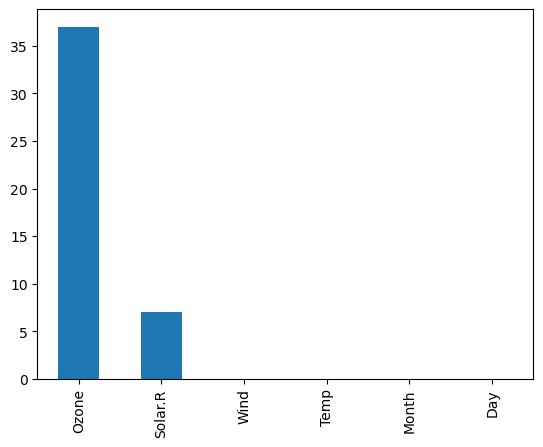

In [27]:
# 시각화 
air.isnull().sum().plot(kind = 'bar')

### 6.1.2.결측치 제거

- **dropna()** 메서드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplace=True 옵션을 지정해야 해당 데이터프레임에 실제로 반영됩니다.
- axis 옵션으로 행을 제거할 지 열을 제거할 지 지정합니다.
    - axis=0: 행 제거(기본값)
    - axis=1: 열 제거

**1) 어떤 열이든 결측치가 있는 행 제거**

- dropna() 메서드는 기본적으로 어느 열이든 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_01.png' width=300 align="left"/>

In [29]:
# 데이터프레임 복사
air_test = air.copy()

# 열의 결측치 개수 확인
air_test.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [33]:
# 결측치가 하나라도 있는 행 제거
air_test.dropna(inplace = True ,axis = 0 )

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 열에 결측치가 있는 행 제거**

- subset 옵션에 열을 지정해 해당 열에 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_02.png' width=300 align="left"/>

In [53]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 열이 결측치인 행 제거
air_test.dropna(subset =['Ozone'], inplace = True ,axis = 0 )

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**3) 결측치가 있는 모든 열 제거**

- axis=1 옵션을 지정해 열을 제거할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_03.png' width=300 align="left"/>

In [ ]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치가 있는 열 제거
air_test.dropna(inplace = True ,axis = 1 )

# 확인
air_test.isna().sum()

### 6.1.3.결측치 채우기

- **fillna()** 메서드를 사용해 결측치를 다른 값으로 채울 수 있습니다.

**1) 평균값으로 채우기**

- 결측치가 있는 열의 평균값을 구한 후 결측치를 그 값으로 채웁니다.

In [55]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 평균 구하기
mean_Ozone = air_test['Ozone'].mean()

# 결측치를 평균값으로 채우기
air_test['Ozone'].fillna(mean_Ozone, inplace = True)

# 확인
air_test.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_18440\3948445104.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_test['Ozone'].fillna(mean_Ozone, inplace = True)


Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 값으로 채우기**

- 모든 결측치, 또는 일부 결측치를 특정 값으로 채웁니다.

In [61]:
# 데이터프레임 복사
air_test = air.copy()
# Solar.R 열의 누락된 값을 0으로 채우기
air_test['Solar.R'].fillna(0, inplace = True)
#air_test['Solar.R']= air_test['Solar.R'].fillna(0) # No Warnning 
# 확인
air_test.isna().sum()

Ozone      37
Solar.R     0
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

**4) 직전 행의 값 또는 바로 다음 행의 값으로 채우기**

- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- 날짜 또는 시간의 흐름에 따른 값을 갖는 시계열 데이터 처리시 유용합니다.
- **method='ffill'**: 바로 앞의 값으로 변경(Forward Fill)
- **method='bfill'**: 바로 다음 값으로 변경(Backward Fill)

<img src='https://raw.githubusercontent.com/Jangrae/img/master/ffill_bfill.png' width=600 align="left"/>

In [41]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치 확인
air_test.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [63]:
# Ozone 열의 누락된 값을 바로 앞의 값으로 채우기
air_test['Ozone'] = air_test['Ozone'].fillna(method='ffill')

# Solar.R 열의 누락된 값을 바로 뒤의 값으로 채우기
air_test['Solar.R'] = air_test['Solar.R'].fillna(method='bfill')

# 확인
air_test.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_18440\4023962226.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_test['Ozone'] = air_test['Ozone'].fillna(method='ffill')
C:\Users\User\AppData\Local\Temp\ipykernel_18440\4023962226.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air_test['Solar.R'] = air_test['Solar.R'].fillna(method='bfill')


Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**5) 선형보간법으로 채우기**

- **interpolate()** 메서드를 사용해 선형보간법으로 채울 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/interpolate.png' width=300 align="left"/>

In [47]:
# 데이터프레임 복사
air_test = air.copy()

# 선형보간법으로 채우기
air_test.interpolate(methon = 'linear'inplace = True )


# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

## 6.2.가변수(Dummy Variable) 만들기

- 가변수는 일정하게 정해진 범위의 값을 갖는 데이터(범주형 데이터)를 독립된 열로 변환한 것입니다.
- 특히 범주형 문자열 데이터는 머신러닝 알고리즘에 사용하려면 숫자로 변환해야 합니다.
- 가변수를 만드는 과정을 **One-Hot-Encoding** 이라고 부르기도 합니다.
- **get_dummies()** 함수를 사용해서 가변수를 쉽게 만들 수 있습니다.
- 머신러닝 모델에서 중요한 과정

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies1.png' width=700 align="left"/>

In [84]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/tips.csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 6.2.1.범주형 변수 확인

- 범주형 여부를 우선 확인해야 합니다.
- 문자열 값을 갖는 열이 범수형 값을 갖는 경우가 많습니다.

In [87]:
# 열 확인
tip.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### 6.2.2.변수 개별 처리

- columns 옵션에 열을 하나 지정해 처리할 수 있습니다.
- 자동으로 원본 열이 제거되고, 열 이름이 prefix로 사용됩니다.
- 다중공선성 문제를 없애기 위해 **drop_first=True** 옵션을 지정합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/get_dummies2.png' width=600 align="left"/>

<img src='https://raw.githubusercontent.com/Jangrae/img/master/multicollinearity.png' width=500 align="left"/>

In [92]:
# 가변수화: sex
dummy_cols = ['sex']
tip = pd.get_dummies(tip, columns = dummy_cols ,drop_first = False , dtype = int)

# 확인
tip.head()

,total_bill,tip,smoker,day,time,size,sex_Female,sex_Male
0,16.99,1.01,No,Sun,Dinner,2,1,0
1,10.34,1.66,No,Sun,Dinner,3,0,1
2,21.01,3.50,No,Sun,Dinner,3,0,1
3,23.68,3.31,No,Sun,Dinner,2,0,1
4,24.59,3.61,No,Sun,Dinner,4,1,0


### 6.2.3.일괄 처리

- columns 옵션에 대상 열을 **리스트**로 지정해 한 번에 처리합니다.
- 자동으로 열 이름이 prefix로 지정되며 원본 열이 제거됩니다.
- columns 옵션을 지정하지 않으면 문자열 값을 갖는 열 모두를 대상으로 합니다.

In [94]:
# 여러 범주형 변수를 가변수화: smoker, day, time

dummy_cols = ['smoker','day','time']
tip = pd.get_dummies(tip, columns = dummy_cols ,drop_first = False , dtype = int)

# 확인
tip.head()

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
